# E3 - ARIMA

Elaborado por GRUPO 1:
- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [104]:
# Librerias y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## 3.1. Análisis AFC y PAFC de 4 Series

In [105]:
series = pd.read_csv('data_arma.csv', header=0, index_col=0)
series.describe()

,ts1,ts2,ts3,ts4
count,500.000000,500.000000,500.000000,500.000000
mean,-0.009962,0.104446,-0.031936,-0.013467
std,1.095166,2.242134,1.884763,1.013414
min,-3.577476,-6.880294,-5.760386,-3.022557
25%,-0.745666,-1.498428,-1.333192,-0.723487
50%,-0.041335,0.083156,0.135272,0.012143
75%,0.720957,1.835505,1.271606,0.693693
max,3.492215,6.297951,5.604490,2.960854


<AxesSubplot:>

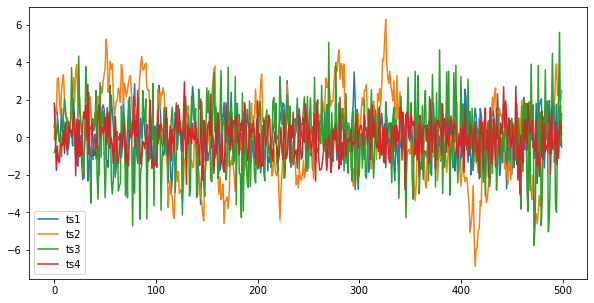

In [106]:
series.plot(figsize=(10, 5))

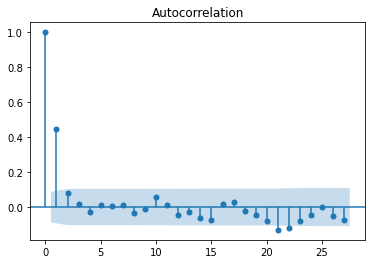

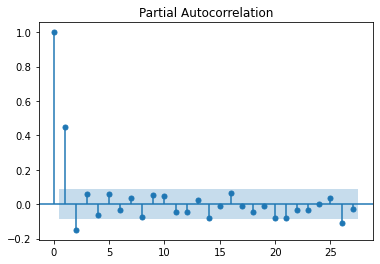

In [107]:
#ACF y PACF serie ts1
plot_acf(series.ts1);
plot_pacf(series.ts1);

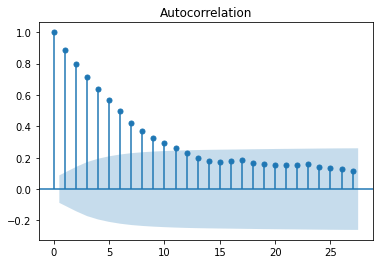

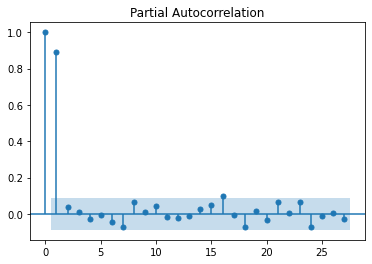

In [108]:
#ACF y PACF serie ts2
plot_acf(series.ts2);
plot_pacf(series.ts2);

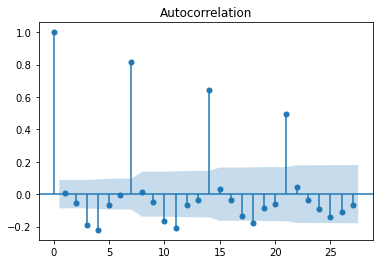

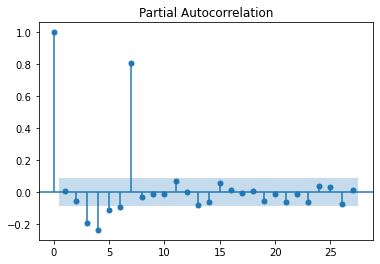

In [109]:
#ACF y PACF serie ts3
plot_acf(series.ts3);
plot_pacf(series.ts3);

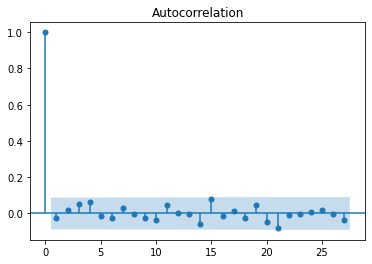

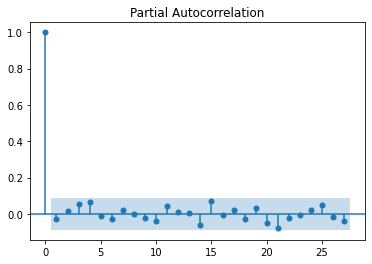

In [110]:
#ACF y PACF serie ts4
plot_acf(series.ts4);
plot_pacf(series.ts4);

## 3.2. Análisis serie "Ventas de Shampoo"

<ipython-input-111-67e9d9ce8e45>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


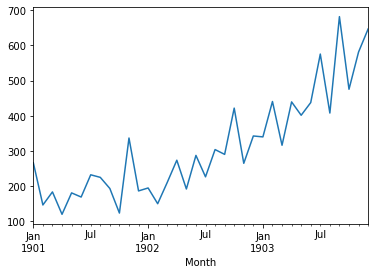

In [111]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
shampoo = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(shampoo.head())
shampoo.plot(figsize=(6, 4));

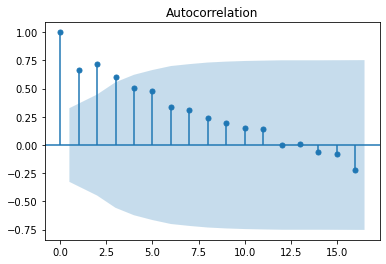

In [112]:
#Función de Autocorrelación
plot_acf(shampoo);

La ACF sugiere una diferenciación.

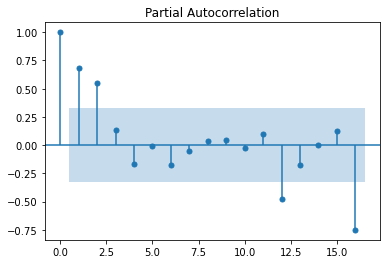

In [113]:
#Función de Autocorrelación Parcial
plot_pacf(shampoo);

La PACF sugiere un autorregresivo de orden 3.

In [116]:
#Bases de train y test
X = shampoo.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

### a. Modelo ARIMA(3,1,0)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -121.992
Method:                       css-mle   S.D. of innovations             59.934
Date:                Fri, 09 Jul 2021   AIC                            253.983
Time:                        00:50:48   BIC                            259.439
Sample:                             1   HQIC                           255.269
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8087      4.738      1.437      0.151      -2.477      16.095
ar.L1.D.y     -0.9051      0.205     -4.414      0.000      -1.307      -0.503
ar.L2.D.y     -0.5221      0.269     -1.942      0.0

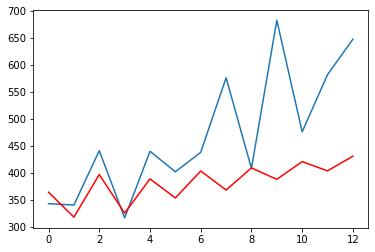

In [117]:
# fit model
model1 = ARIMA(history, order=(3,1,0))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

output = model1_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


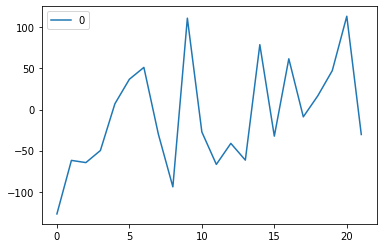

In [120]:
# plot residual errors
residuals = pd.DataFrame(model1_fit.resid)
residuals.plot()
plt.show()

In [119]:
# MSE
mse1 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse1)

Test MSE: 16994.713


### b. Modelo ARIMA(3,1,1)

/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA an

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -121.517
Method:                       css-mle   S.D. of innovations             58.322
Date:                Fri, 09 Jul 2021   AIC                            255.033
Time:                        00:51:23   BIC                            261.580
Sample:                             1   HQIC                           256.576
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0137      3.399      2.063      0.039       0.352      13.676
ar.L1.D.y     -0.5688      0.399     -1.426      0.154      -1.351       0.213
ar.L2.D.y     -0.2719      0.391     -0.696      0.4

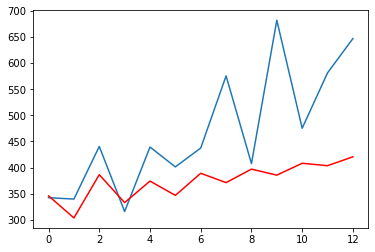

In [121]:
# fit model
model2 = ARIMA(history, order=(3,1,1))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

output = model2_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


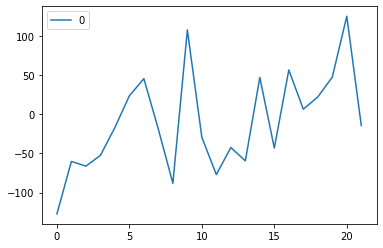

In [122]:
# plot residual errors
residuals = pd.DataFrame(model2_fit.resid)
residuals.plot()
plt.show()

In [123]:
# MSE
mse2 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse2)

Test MSE: 17779.501


### c. Modelo ARIMA(3,1,2)

/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -119.530
Method:                       css-mle   S.D. of innovations             47.916
Date:                Fri, 09 Jul 2021   AIC                            253.059
Time:                        00:51:54   BIC                            260.696
Sample:                             1   HQIC                           254.858
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3326      4.404      1.665      0.096      -1.299      15.964
ar.L1.D.y     -0.2412      0.178     -1.354      0.176      -0.590       0.108
ar.L2.D.y     -0.4758      0.140     -3.394      0.0

/Users/alexander/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


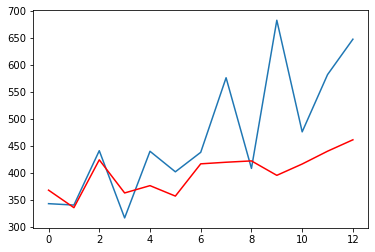

In [125]:
# fit model
model3 = ARIMA(history, order=(3,1,2))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

output = model3_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

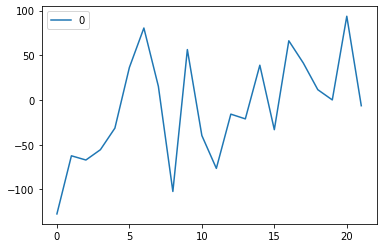

In [126]:
# plot residual errors
residuals = pd.DataFrame(model3_fit.resid)
residuals.plot()
plt.show()

In [127]:
# MSE
mse3 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse3)

Test MSE: 13474.279
